In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime

Data Understanding

Load Data

In [16]:
data = pd.read_csv('walmart.csv')

In [17]:
print("Dataset Sample:")
print(data.head(30))

Dataset Sample:
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1  05-02-2010    1643690.90             0        42.31       2.572   
1       1  12-02-2010    1641957.44             1        38.51       2.548   
2       1  19-02-2010    1611968.17             0        39.93       2.514   
3       1  26-02-2010    1409727.59             0        46.63       2.561   
4       1  05-03-2010    1554806.68             0        46.50       2.625   
5       1  12-03-2010    1439541.59             0        57.79       2.667   
6       1  19-03-2010    1472515.79             0        54.58       2.720   
7       1  26-03-2010    1404429.92             0        51.45       2.732   
8       1  02-04-2010    1594968.28             0        62.27       2.719   
9       1  09-04-2010    1545418.53             0        65.86       2.770   
10      1  16-04-2010    1466058.28             0        66.32       2.808   
11      1  23-04-2010    1391256.12             

In [18]:
print("\nInformasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [19]:
print("\nStatistik Deskriptif Dataset:")
print(data.describe())


Statistik Deskriptif Dataset:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max 

In [20]:
print("\nJumlah Data:")
print(f"Baris: {data.shape[0]}, Kolom: {data.shape[1]}")


Jumlah Data:
Baris: 6435, Kolom: 8


**Data Preparation**

Handle Missing Values

In [21]:
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


Convert 'Date' to datetime format

In [22]:
#Normalisasi format tanggal: ganti '/' dengan '-'
data['Date'] = data['Date'].str.replace('/', '-', regex=False)
#Konversi ke format datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
#Tampilkan hasil konversi
print("\nDate Column After Conversion:")
print(data['Date'].head())
#Hapus baris dengan tanggal tidak valid (NaT)
data = data.dropna(subset=['Date'])
#Verifikasi jumlah data yang valid
print("\nJumlah data setelah menghapus tanggal tidak valid:", data.shape[0])


Date Column After Conversion:
0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: Date, dtype: datetime64[ns]

Jumlah data setelah menghapus tanggal tidak valid: 6435


In [23]:
print(data.head(50))

    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1 2010-02-05    1643690.90             0        42.31       2.572   
1       1 2010-02-12    1641957.44             1        38.51       2.548   
2       1 2010-02-19    1611968.17             0        39.93       2.514   
3       1 2010-02-26    1409727.59             0        46.63       2.561   
4       1 2010-03-05    1554806.68             0        46.50       2.625   
5       1 2010-03-12    1439541.59             0        57.79       2.667   
6       1 2010-03-19    1472515.79             0        54.58       2.720   
7       1 2010-03-26    1404429.92             0        51.45       2.732   
8       1 2010-04-02    1594968.28             0        62.27       2.719   
9       1 2010-04-09    1545418.53             0        65.86       2.770   
10      1 2010-04-16    1466058.28             0        66.32       2.808   
11      1 2010-04-23    1391256.12             0        64.84       2.795   

Feature Engineering

In [24]:
# Tambahkan fitur baru dari kolom 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

# Cek data setelah feature engineering
print("\nDataset After Feature Engineering:\n", data.head())


Dataset After Feature Engineering:
    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  
0  211.096358         8.106  2010      2     5  
1  211.242170         8.106  2010      2     6  
2  211.289143         8.106  2010      2     7  
3  211.319643         8.106  2010      2     8  
4  211.350143         8.106  2010      3     9  


Scalling

In [25]:
# Pilih kolom yang akan di-scale
columns_to_scale = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
# Inisialisasi scaler
scaler = MinMaxScaler()
# Lakukan scaling
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
# Cek data setelah scaling
print("\nDataset After Scaling:\n", data.head())


Dataset After Scaling:
    Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05      0.397291             0     0.434149    0.050100   
1      1 2010-02-12      0.396811             1     0.396967    0.038076   
2      1 2010-02-19      0.388501             0     0.410861    0.021042   
3      1 2010-02-26      0.332458             0     0.476419    0.044589   
4      1 2010-03-05      0.372661             0     0.475147    0.076653   

        CPI  Unemployment  Year  Month  Week  
0  0.840500      0.405118  2010      2     5  
1  0.841941      0.405118  2010      2     6  
2  0.842405      0.405118  2010      2     7  
3  0.842707      0.405118  2010      2     8  
4  0.843008      0.405118  2010      3     9  


Splitting Data

In [26]:
# Pilih fitur (X) dan target (y)
X = data[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']]
y = data['Weekly_Sales']
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Cek hasil split
print(f"\nJumlah data training: {X_train.shape[0]} rows")
print(f"Jumlah data testing: {X_test.shape[0]} rows")


Jumlah data training: 5148 rows
Jumlah data testing: 1287 rows


Exploratory Data Analysis (EDA)

Distribusi Target Variable

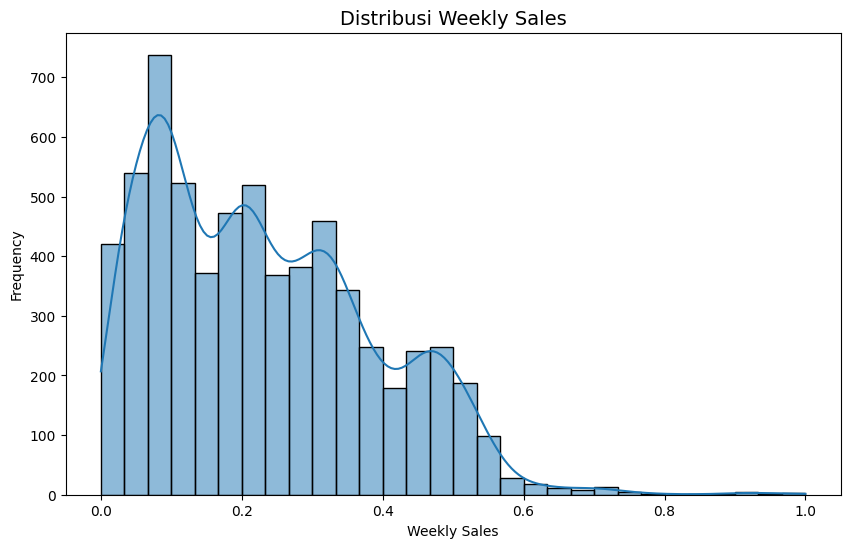

In [27]:
# Visualisasi distribusi Weekly_Sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Weekly_Sales'], kde=True, bins=30)
plt.title("Distribusi Weekly Sales", fontsize=14)
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

Korelasi Antar Variable

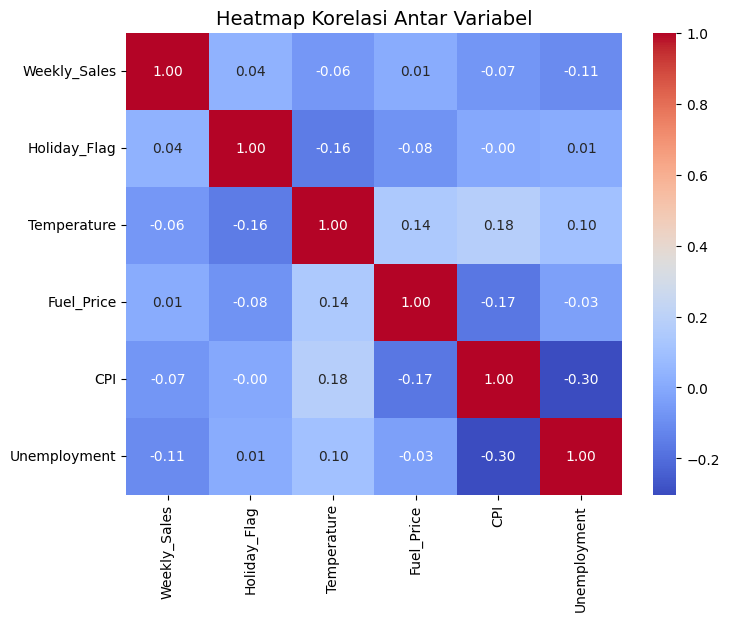

In [28]:
# Hitung korelasi
correlation = data[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14)
plt.show()

Analisis Tren Penjualan Mingguan

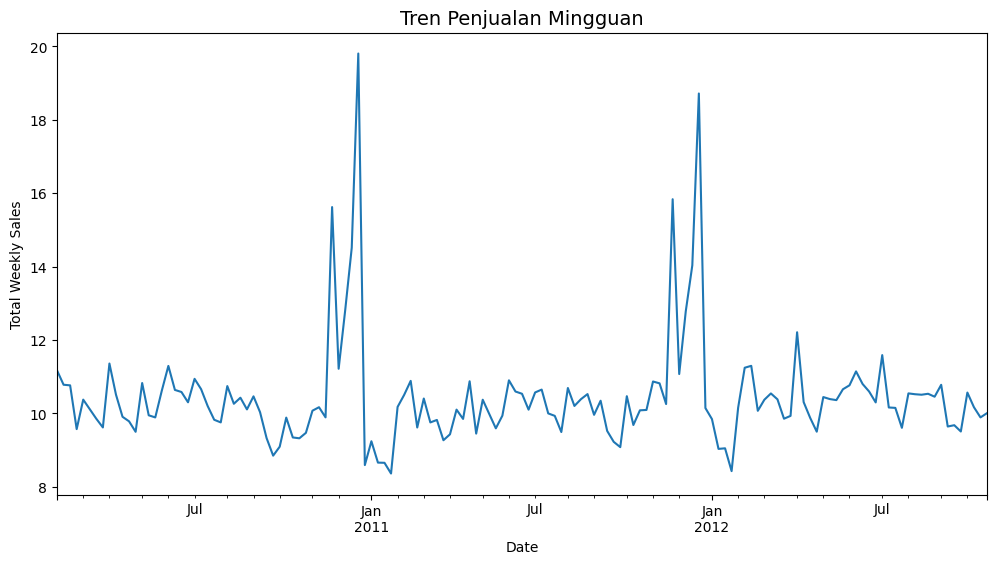

In [29]:
# Tren penjualan berdasarkan waktu
plt.figure(figsize=(12, 6))
data.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title("Tren Penjualan Mingguan", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.show()

Penjualan berdasarkan Holiday Flag

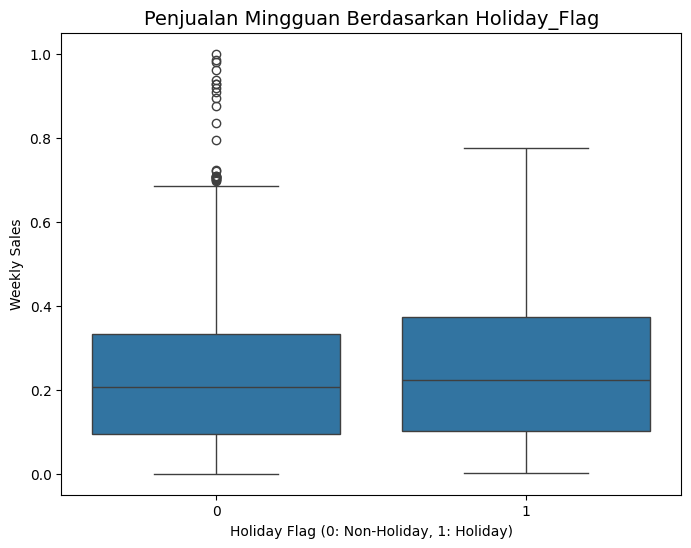

In [30]:
# Boxplot Weekly_Sales berdasarkan Holiday_Flag
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Holiday_Flag', y='Weekly_Sales')
plt.title("Penjualan Mingguan Berdasarkan Holiday_Flag", fontsize=14)
plt.xlabel("Holiday Flag (0: Non-Holiday, 1: Holiday)")
plt.ylabel("Weekly Sales")
plt.show()

Hubungan temp dengan weekly sales

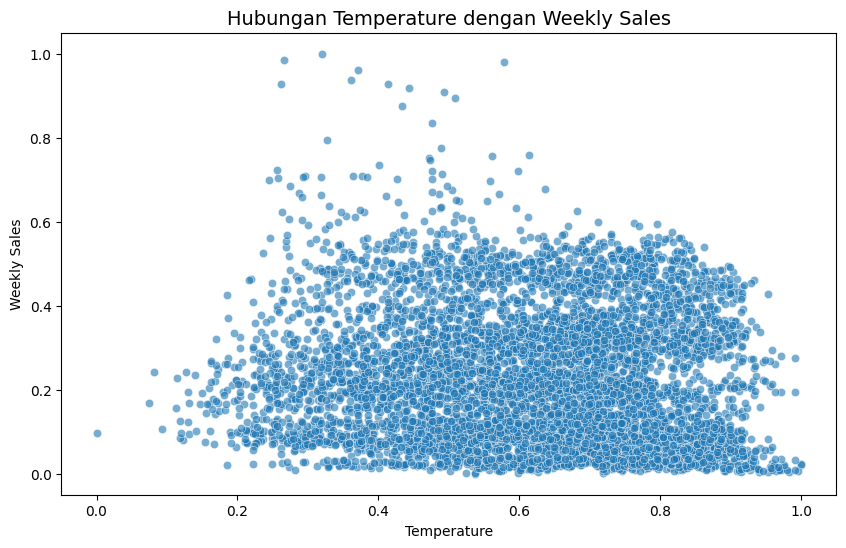

In [31]:
# Scatterplot Weekly_Sales vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales', alpha=0.6)
plt.title("Hubungan Temperature dengan Weekly Sales", fontsize=14)
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

Distribusi Variable Numerik

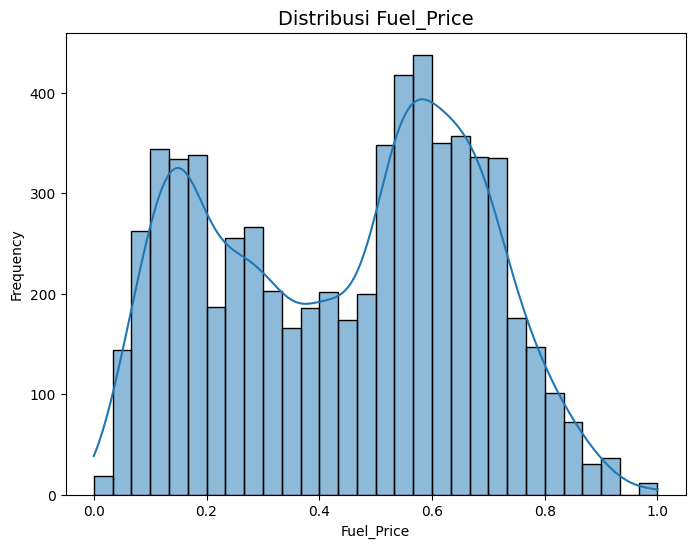

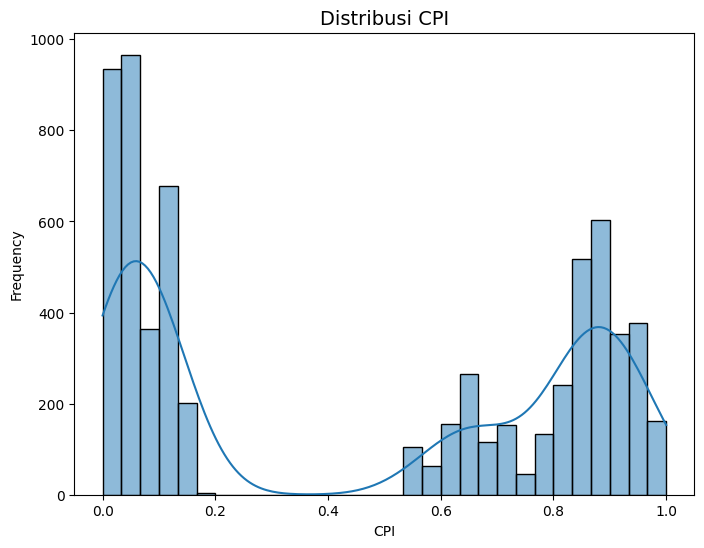

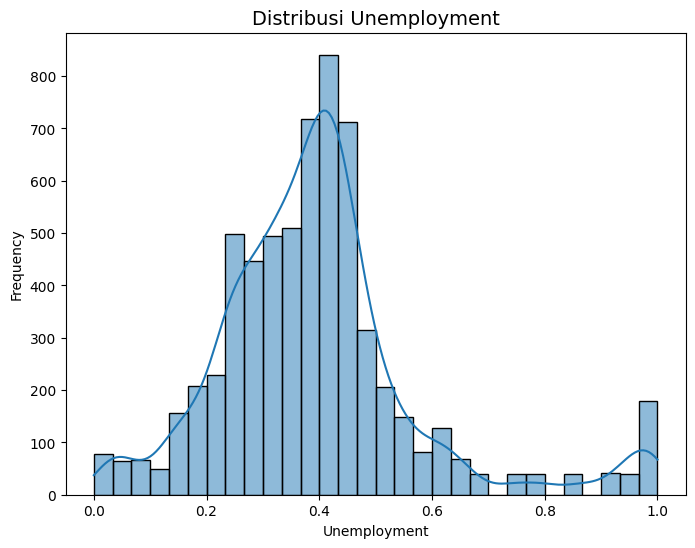

In [32]:
# Distribusi variabel numerik lainnya
numerical_features = ['Fuel_Price', 'CPI', 'Unemployment']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f"Distribusi {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

**Model Development**

Linear Regression

In [33]:
# Inisialisasi model Linear Regression
linear_model = LinearRegression()
# Latih model dengan data training
linear_model.fit(X_train, y_train)
# Prediksi data testing
y_pred_linear = linear_model.predict(X_test)
# Evaluasi performa model Linear Regression
mae = mean_absolute_error(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

Linear Regression Performance:
MAE: 0.12
MSE: 0.02
R²: 0.16


Random Forest

In [34]:
# Inisialisasi model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
# Latih model dengan data training
rf_model.fit(X_train, y_train)
# Prediksi data testing
y_pred_rf = rf_model.predict(X_test)
# Evaluasi performa model Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")


Random Forest Regressor Performance:
MAE: 0.02
MSE: 0.00
R²: 0.96


In [35]:
# Buat DataFrame untuk perbandingan performa
performance = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae, mae_rf],
    "MSE": [mse, mse_rf],
    "R²": [r2, r2_rf]
})

print("\nComparison of Model Performance:")
print(performance)


Comparison of Model Performance:
               Model       MAE      MSE        R²
0  Linear Regression  0.119876  0.02089  0.155532
1      Random Forest  0.017211  0.00100  0.959573


Cek Overfitting

In [36]:
y_train_pred_rf = rf_model.predict(X_train)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
print(f"R² on Training Data: {r2_train_rf:.2f}")
print(f"R² on Testing Data: {r2_rf:.2f}")

R² on Training Data: 0.99
R² on Testing Data: 0.96


**Final Evaluation**

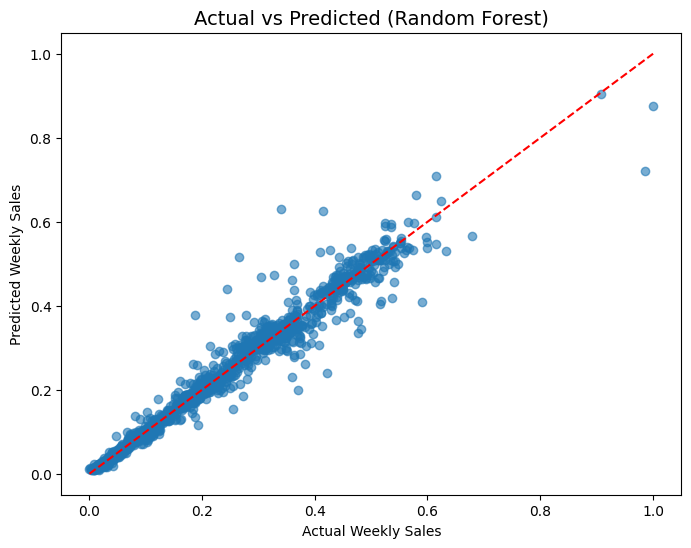

In [37]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.title("Actual vs Predicted (Random Forest)", fontsize=14)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()